In [ ]:
import argparse
import cv2
import imutils
import numpy as np
import os

#Set the path for the image to be opened
path = r'C:\Users\lucag\Desktop\Images\1.jpg'
#Open the image
image = cv2.imread(path)

#Get image dimensions
(h, w, d) = image.shape # getting image dimensions (height, width, depth, a.k.a. channels)
print("width={}, height={}, depth={}".format(w, h, d))

#Get the three channel values for a single pixel
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

#Resize the image keeping the aspect ratio
new_width = 100.0
r = new_width / w
dim = (int(new_width), int(h * r))
resized = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized)

#OR, with imutils
resized = imutils.resize(image, width=300)
cv2.imshow("Imutils Resize", resized)

#Blur the image to reduce noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", blurred)

#Draw a rectangle
output = image.copy()
tl_vertex = (20, 160)
br_vertex = (40, 60)
bl_vertex = (tl_vertex[0], br_vertex[1])
tr_vertex = (br_vertex[0], tl_vertex[1])

cv2.rectangle(output, tl_vertex, br_vertex, (0, 0, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)
cv2.imshow("Rectangle", output)

#convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

GR = gray[100, 50]

integral = np.sum(gray[bl_vertex[1]:tl_vertex[1], bl_vertex[0]:br_vertex[0]]) #y1:y2, x1:x2
print("GR={}".format(GR))
print("Integral={}".format(integral))

cv2.imshow("image", image)
cv2.waitKey(0)

Is the number of rectangles to be catched fixed? y -> yes    any other key -> No
2
Do you want to insert catch another rectangle? y -> yes    any other key -> No
y
Do you want to insert catch another rectangle? y -> yes    any other key -> No
n


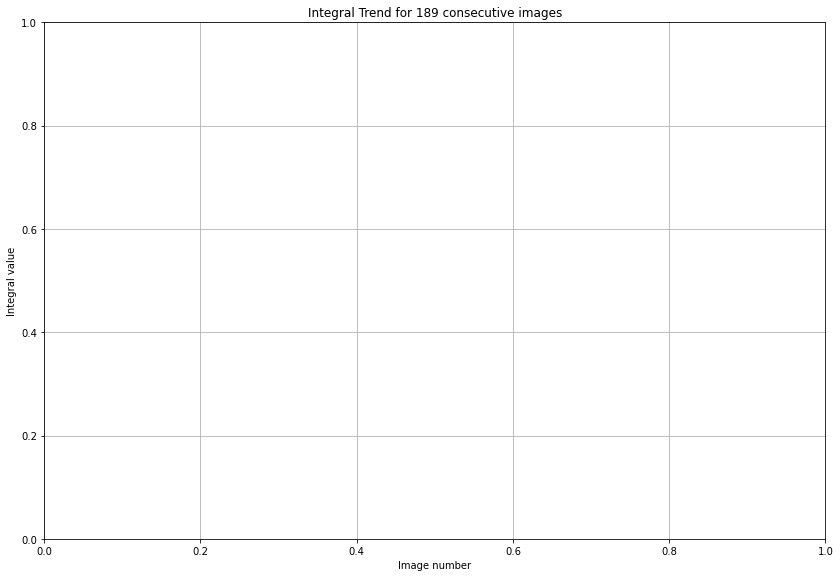

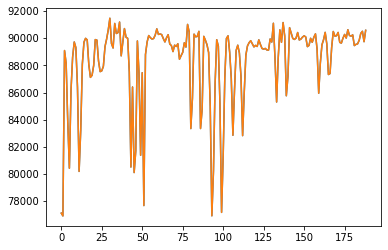

In [4]:
import sys
import os
import argparse
import cv2
import imutils
import numpy as np
import imutils
import copy
import matplotlib.pyplot as plt
username = 'PC' # 'admin' for BO1 lab
sys.path.append('c:/users/'+ username +'/miniconda3/lib/site-packages')
path_to_selectinwindow = './MyCustomPackage/opencvdragrect-master' # relative path to the MyCustomPackage folder 
sys.path.append(path_to_selectinwindow)
import selectinwindow

#Set the path for the image to be opened
path = r'C:\Users\lucag\Desktop\Actual_Images\Sweep_dof_input5_10V_10mA_058_21102021_155858_375.png'
#Open the image
image = cv2.imread(path)

#convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#OR, with imutils
gray = imutils.resize(gray, width=1080)

# Defining function to draw rectangle
def catch_rectangle(gray,wName):
    
    """
    The function take as input the image the rectangle has to be catched on.
    Once the rectangle is drawn, double click inside it and it will be catched.
    """
    # Initialize the  drag object
    wName = "select region " + wName
    # height, width, number of channels in image
    imageHeight = gray.shape[0]
    imageWidth = gray.shape[1]

    # Define the drag object
    rectI = selectinwindow.DragRectangle(gray, wName, imageWidth, imageHeight)

    cv2.namedWindow(rectI.wname)
    cv2.setMouseCallback(rectI.wname, selectinwindow.dragrect, rectI)

    # keep looping until rectangle finalized
    while True:
        # display the image
        cv2.imshow(wName, rectI.image)
        key = cv2.waitKey(1) & 0xFF

        # if returnflag is True, break from the loop
        if rectI.returnflag:
            break
    return copy.deepcopy(rectI)

# ask if number of rectangles to be catched is already known
rectangles = []
fixed_number = input("Is the number of rectangles to be catched fixed? y -> yes    any other key -> No\n")
if fixed_number == "y":
    number_of_rectangles = int(input("Insert the number of rectangles to be catched: "))
    # CALL THAT MANY TIMES THE CATCH_RECTANGLE FUNCTION
    for i in range(number_of_rectangles):
        rectangles.append(catch_rectangle(gray,str(i)))
    
else: # START CALLING THE CATCH_RECTANGLE FUNCTION UNTIL THE USER STOP IT
    repeat = "y"
    while repeat == "y":
        # CALL THE CATCH_RECTANGLE FUNCTION
        rectangles.append(catch_rectangle(gray, str(i)))
        repeat = input("Do you want to insert catch another rectangle? y -> yes    any other key -> No\n")
    
#rectI = catch_rectangle(gray)

#Set the directory containing the images to be opened
directory = r'C:\Users\lucag\Desktop\Actual_Images' #Images

integral = [[] for i in range(len(rectangles))] # integral is a list of the given number of rectangles. 
                                                # The length of each rectangle is equal to the number of images to be processed.

# Sequentially open each image -------------------------------------

for i in os.listdir(directory): 
    
    image = cv2.imread(directory + "/" + i)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Resizing the image
    gray = imutils.resize(gray, width=1080)
    output = gray.copy()
    
    for k in range(len(rectangles)):

        # Computing the sum of pixel values inside the selected rectangle
        integral[k].append(np.sum(gray[rectangles[k].outRect.y:(rectangles[k].outRect.y + rectangles[k].outRect.h) , rectangles[k].outRect.x:(rectangles[k].outRect.w + rectangles[k].outRect.x)])) #y1:y2, x1:x2 
        #print("Integral={}".format(integral))
        #print("Image shape: height -> " + str(gray.shape[0]) + " and width -> " + str(gray.shape[1]))

        #Draw a rectangle #CONTROLLA SE IL PRIMO PUNTO è IL VERTICE SINISTRO SUPERIORE O INFERIORE (IF COORD Y DEL PRIMO PUNTO >= DI COORD Y PUNTO FINALE O NO)
        tl_vertex = (rectangles[k].outRect.x, rectangles[k].outRect.y + rectangles[k].outRect.h)
        br_vertex = (rectangles[k].outRect.x + rectangles[k].outRect.w, rectangles[k].outRect.y)
        bl_vertex = (rectangles[k].outRect.x, rectangles[k].outRect.y)
        tr_vertex = (rectangles[k].outRect.x + rectangles[k].outRect.w, rectangles[k].outRect.y + rectangles[k].outRect.h)

        #print("Dragged rectangle coordinates")
        #print("Top left vertex: ({},{}), Bottom left vertex: ({},{}), Top right vertex: ({},{}), Bottom right vertex: ({},{})" \
        #      .format(tl_vertex[0],tl_vertex[1],bl_vertex[0],bl_vertex[1],tr_vertex[0],tr_vertex[1],br_vertex[0],br_vertex[1]))

        cv2.rectangle(output, tl_vertex, br_vertex, (255, 255, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)

    
    cv2.imshow("Rectangle", output)
    cv2.waitKey(100)  

# -----------------------------------------------------------    

    
#Plotting the integral ----------------------------

data_figure = plt.figure("Integrals")
data_figure.set_size_inches(14, 9.5, forward=True)
data_plot = data_figure.add_subplot(111)

f, ax = plt.subplots(1)

for i in range(len(integral)): # plot integral values for each rectangle
    ax.plot(integral[i])
    
data_plot.set_xlabel('Image number')
data_plot.set_ylabel('Integral value')
data_plot.set_title('Integral Trend for ' + str(len(integral[0])) + ' consecutive images')
data_plot.grid(True)
#plt.xticks(range(len(integral)))
#data_plot.tight_layout()
plt.show()
#plt.savefig('../Figures/' + filename + '.png')

# -----------------------------------------------------------
        
'''       
# Computing the sum of pixel values inside the selected rectangle
integral = np.sum(gray[rectI.outRect.y:(rectI.outRect.y+rectI.outRect.h) , rectI.outRect.x:(rectI.outRect.w+rectI.outRect.x)])  #y1:y2, x1:x2
print("GR={}".format(GR))
print("Integral={}".format(integral))
print("Image shape: height -> " + str(gray.shape[0]) + " and width -> " + str(gray.shape[1]))

#Draw a rectangle #CONTROLLA SE IL PRIMO PUNTO è IL VERTICE SINISTRO SUPERIORE O INFERIORE (IF COORD Y DEL PRIMO PUNTO >= DI COORD Y PUNTO FINALE O NO)
output = gray.copy()
tl_vertex = (rectI.outRect.x, rectI.outRect.y+rectI.outRect.h)
br_vertex = (rectI.outRect.x+rectI.outRect.w, rectI.outRect.y)
bl_vertex = (rectI.outRect.x, rectI.outRect.y)
tr_vertex = (rectI.outRect.x+rectI.outRect.w, rectI.outRect.y+rectI.outRect.h)

print("Dragged rectangle coordinates")
print("Top left vertex: ({},{}), Bottom left vertex: ({},{}), Top right vertex: ({},{}), Bottom right vertex: ({},{})" \
      .format(tl_vertex[0],tl_vertex[1],bl_vertex[0],bl_vertex[1],tr_vertex[0],tr_vertex[1],br_vertex[0],br_vertex[1]))

cv2.rectangle(output, tl_vertex, br_vertex, (0, 0, 255), 2) #(source_image, top left corner, bottom right corner, color, thickness)
cv2.imshow("Rectangle", output)
cv2.waitKey(0) 
'''


# close all open windows
cv2.destroyAllWindows()

In [ ]:
import argparse
import cv2
import imutils
import numpy as np
import os

#Set the directory containing the images to be opened
directory =  "C:/Users/lucag/Desktop/Images" #r'C:\Users\lucag\Desktop\Images'

#Change to directory
#os.chdir(directory) 

# sequentially open each image
for i in os.listdir(directory):
    image = cv2.imread(directory + "/" + i)
    cv2.imshow("image", image)
    cv2.waitKey(0)    

In [3]:
rectangles[0].outRect.h

36

In [ ]:
rectangles.append([])
rectangles[-1] = catch_rectangle(gray)

In [ ]:
rectangles[-2].outRect.h

In [ ]:
rectangless = catch_rectangle(gray)

In [ ]:
rectangless2 = catch_rectangle(gray)

In [ ]:
rectangless.outRect.h

In [ ]:
rectangless2.outRect.h